## DREAM dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Excelなどが使えずcsvファイルのインデックス列を削除できていない場合
# os.mkdir("C:/Users/Mitsu/Desktop/AISTATS/230923/")
# os.chdir("C:/Users/Mitsu/Desktop/AISTATS/COVID_logitudinal/covid_data_diff") # 差分系列
# os.chdir("C:/Users/Mitsu/Desktop/AISTATS/COVID_logitudinal/covid_data_log") # 対数系列
# os.chdir("C:/Users/Mitsu/Desktop/AISTATS/COVID_logitudinal/covid_data_logdiff") # 対数差分系列
os.chdir("C:/Users/Mitsu/Desktop/AISTATS/real_world_dataset/DREAM7")

In [21]:
df = pd.read_csv("model1_0/model1/wildtype_lowresmRNA1.tab", sep="\t",encoding="utf-8")
del df["Time"]
df

,v1_mrna,v2_mrna,v3_mrna,v4_mrna,v5_mrna,v6_mrna,v7_mrna,v8_mrna,v9_mrna
0,0.024,0.032,0.000,0.000,0.096,0.123,0.000,0.215,0.000
1,0.000,0.000,0.635,1.508,1.444,1.190,1.059,0.211,0.066
2,0.116,0.000,0.261,1.297,0.624,1.544,1.319,0.000,0.277
3,0.103,0.205,0.147,1.612,1.146,0.704,1.008,0.000,0.192
4,0.000,0.000,0.000,1.923,1.319,1.048,0.628,0.000,0.027
5,0.000,0.000,0.017,1.309,1.219,0.844,0.594,0.044,0.000
6,0.006,0.139,0.109,1.529,0.808,0.918,0.736,0.216,0.000
7,0.042,0.047,0.135,1.735,1.149,1.002,0.613,0.025,0.117
8,0.094,0.000,0.252,1.423,0.644,0.961,1.179,0.112,0.000
9,0.042,0.000,0.192,1.382,0.000,0.837,1.015,0.000,0.316


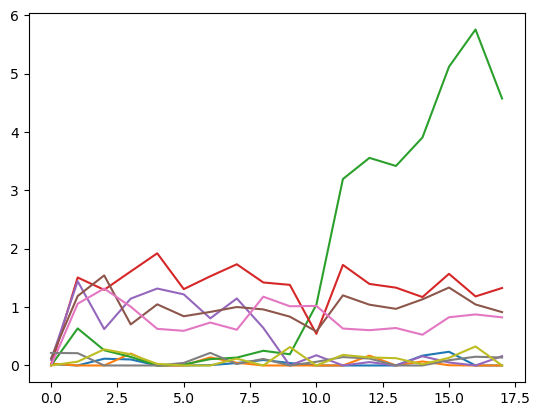

In [4]:
for i in range(1,len(df.columns)):
    plt.plot(df[df.columns[i]])

In [5]:
from statsmodels.tsa.stattools import adfuller

In [32]:
print('Results of Dickey-Fuller Examination:')
# dftest = adfuller(df['diff_change'][1:], autolag='AIC')
genelist = list(df.columns)
TS_list, pval_list, lags_list, numobs_list, cri1_list, cri5_list, cri10_list = [],[],[],[],[],[],[]
for i in range(1,10):
    dftest = adfuller(df["v"+str(i)+"_mrna"])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    TS_list.append(dfoutput["Test Statistic"])
    pval_list.append(dfoutput["p-value"])
    lags_list.append(dfoutput["#Lags Used"])
    numobs_list.append(dfoutput["Number of Observations Used"])
    cri1_list.append(dfoutput["Critical Value (1%)"])
    cri5_list.append(dfoutput["Critical Value (5%)"])
    cri10_list.append(dfoutput["Critical Value (10%)"])
    
df_ADF_original = pd.DataFrame({
    "Gene": genelist,
    "Test Statistic" : TS_list,
    "p-value": pval_list,
    "Lags used": lags_list,
    "Number of observations used": numobs_list,
    "Critical Value (1%)": cri1_list,
    "Critical Value (5%)": cri5_list,
    "Critical Value (10%)": cri10_list
});df_ADF_original

Results of Dickey-Fuller Examination:


,Gene,Test Statistic,p-value,Lags used,Number of observations used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,v1_mrna,-1.326448,6.169873e-01,7.0,10.0,-4.331573,-3.232950,-2.748700
1,v2_mrna,-2.143655,2.273265e-01,4.0,13.0,-4.068854,-3.127149,-2.701730
2,v3_mrna,-1.963780,3.026764e-01,7.0,10.0,-4.331573,-3.232950,-2.748700
3,v4_mrna,-6.626326,5.863843e-09,0.0,17.0,-3.889266,-3.054358,-2.666984
4,v5_mrna,-15.500649,2.418163e-28,7.0,10.0,-4.331573,-3.232950,-2.748700
5,v6_mrna,-2.431350,1.330829e-01,7.0,10.0,-4.331573,-3.232950,-2.748700
6,v7_mrna,-0.076758,9.517049e-01,7.0,10.0,-4.331573,-3.232950,-2.748700
7,v8_mrna,-2.380508,1.473137e-01,7.0,10.0,-4.331573,-3.232950,-2.748700
8,v9_mrna,-4.932691,3.010908e-05,0.0,17.0,-3.889266,-3.054358,-2.666984


In [39]:
num_of_var = len(df.columns)

df2,df3,df4 = pd.DataFrame({}), pd.DataFrame({}), pd.DataFrame({})
for i in range(len(genelist)):
    tmp = df[df.columns[i]]
    tmp2 = pd.DataFrame({genelist[i]+"(t)": tmp})
    df2 = pd.concat([df2,tmp2],axis=1)
    
    var = [np.nan]
    for j in range(len(tmp)-1):
        var.append(tmp[j])
    
    tmp2 = pd.DataFrame({genelist[i]+"(t-1)": var})
    df3 = pd.concat([df3,tmp2],axis=1)
    
    tmp = [0.001] * len(df)
    tmp2 = pd.DataFrame({"e"+genelist[i]+"(t)": tmp})
    df4 = pd.concat([df4,tmp2],axis=1)
    
    df5 = pd.concat([df2, df3, df4],axis=1)

df5 = df5.dropna()
dis = df5[df5.columns[0:num_of_var]]
gen = df5.copy()

gen.to_csv("sample_data_"+str(num_of_var)+"_train_gen.csv", sep=",", encoding="utf-8")
gen.to_csv("sample_data_"+str(num_of_var)+"_test_gen.csv", sep=",", encoding="utf-8")
dis.to_csv("sample_data_"+str(num_of_var)+"_train_dis.csv", sep=",", encoding="utf-8")
dis.to_csv("sample_data_"+str(num_of_var)+"_test_dis.csv", sep=",", encoding="utf-8")

In [74]:
# 差分系列
df = pd.read_csv("model1_0/model1/wildtype_lowresmRNA1.tab", sep="\t",encoding="utf-8")
del df["Time"]
num_of_var = len(df.columns)

################################
# 差分をとる
df_diff = pd.DataFrame({})
for i in range(len(df.columns)):
    tmp = []
    for j in range(1,len(df)):
        var = df[df.columns[i]][j] - df[df.columns[i]][j-1]
        tmp.append(var)
    tmp2 = pd.DataFrame({df.columns[i]+"_diff": tmp})
    df_diff = pd.concat([df_diff, tmp2], axis=1)

df = df_diff.copy()
###############################

print('Results of Dickey-Fuller Examination:')
# dftest = adfuller(df['diff_change'][1:], autolag='AIC')
genelist = list(df.columns)
TS_list, pval_list, lags_list, numobs_list, cri1_list, cri5_list, cri10_list = [],[],[],[],[],[],[]
for i in range(1,10):
    dftest = adfuller(df["v"+str(i)+"_mrna_diff"])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    TS_list.append(dfoutput["Test Statistic"])
    pval_list.append(dfoutput["p-value"])
    lags_list.append(dfoutput["#Lags Used"])
    numobs_list.append(dfoutput["Number of Observations Used"])
    cri1_list.append(dfoutput["Critical Value (1%)"])
    cri5_list.append(dfoutput["Critical Value (5%)"])
    cri10_list.append(dfoutput["Critical Value (10%)"])
    
df_ADF_original = pd.DataFrame({
    "Gene": genelist,
    "Test Statistic" : TS_list,
    "p-value": pval_list,
    "Lags used": lags_list,
    "Number of observations used": numobs_list,
    "Critical Value (1%)": cri1_list,
    "Critical Value (5%)": cri5_list,
    "Critical Value (10%)": cri10_list
})

#################################
df2,df3,df4 = pd.DataFrame({}), pd.DataFrame({}), pd.DataFrame({})
for i in range(len(genelist)):
    tmp = df[df.columns[i]]
    tmp2 = pd.DataFrame({genelist[i]+"(t)": tmp})
    df2 = pd.concat([df2,tmp2],axis=1)
    
    var = [np.nan]
    for j in range(len(tmp)-1):
        var.append(tmp[j])
    
    tmp2 = pd.DataFrame({genelist[i]+"(t-1)": var})
    df3 = pd.concat([df3,tmp2],axis=1)
    
    tmp = [0.001] * len(df)
    tmp2 = pd.DataFrame({"e"+genelist[i]+"(t)": tmp})
    df4 = pd.concat([df4,tmp2],axis=1)
    
    df5 = pd.concat([df2, df3, df4],axis=1)

df5 = df5.dropna()
dis = df5[df5.columns[0:num_of_var]]
gen = df5.copy()

gen.to_csv("sample_data_"+str(num_of_var)+"_train_gen.csv", sep=",", encoding="utf-8")
gen.to_csv("sample_data_"+str(num_of_var)+"_test_gen.csv", sep=",", encoding="utf-8")
dis.to_csv("sample_data_"+str(num_of_var)+"_train_dis.csv", sep=",", encoding="utf-8")
dis.to_csv("sample_data_"+str(num_of_var)+"_test_dis.csv", sep=",", encoding="utf-8")
df_ADF_original

Results of Dickey-Fuller Examination:


,Gene,Test Statistic,p-value,Lags used,Number of observations used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,v1_mrna_diff,-3.779509,3.124064e-03,3.0,13.0,-4.068854,-3.127149,-2.701730
1,v2_mrna_diff,-6.720910,3.485103e-09,0.0,16.0,-3.924019,-3.068498,-2.673893
2,v3_mrna_diff,-3.279386,1.582543e-02,1.0,15.0,-3.964443,-3.084908,-2.681814
3,v4_mrna_diff,-7.764622,9.258673e-12,0.0,16.0,-3.924019,-3.068498,-2.673893
4,v5_mrna_diff,-9.097036,3.691097e-15,0.0,16.0,-3.924019,-3.068498,-2.673893
5,v6_mrna_diff,-3.066864,2.910460e-02,2.0,14.0,-4.012034,-3.104184,-2.690987
6,v7_mrna_diff,-1.398505,5.829928e-01,6.0,10.0,-4.331573,-3.232950,-2.748700
7,v8_mrna_diff,-5.141203,1.157715e-05,3.0,13.0,-4.068854,-3.127149,-2.701730
8,v9_mrna_diff,-5.335471,4.621427e-06,5.0,11.0,-4.223238,-3.189369,-2.729839


In [98]:
# 対数系列
df = pd.read_csv("model1_0/model1/wildtype_lowresmRNA1.tab", sep="\t",encoding="utf-8")
del df["Time"]
num_of_var = len(df.columns)

################################
# 対数をとる
df_log = pd.DataFrame({})
for i in range(len(df.columns)):
    tmp = []
    for j in range(len(df)):
        var = np.log(df[df.columns[i]][j])
        tmp.append(var)
    tmp2 = pd.DataFrame({df.columns[i]+"_log": tmp})
    df_log = pd.concat([df_log, tmp2], axis=1)

df = df_log.copy()
###############################

df

# #################################
# df2,df3,df4 = pd.DataFrame({}), pd.DataFrame({}), pd.DataFrame({})
# for i in range(len(genelist)):
#     tmp = df[df.columns[i]]
#     tmp2 = pd.DataFrame({genelist[i]+"(t)": tmp})
#     df2 = pd.concat([df2,tmp2],axis=1)
    
#     var = [np.nan]
#     for j in range(len(tmp)-1):
#         var.append(tmp[j])
    
#     tmp2 = pd.DataFrame({genelist[i]+"(t-1)": var})
#     df3 = pd.concat([df3,tmp2],axis=1)
    
#     tmp = [0.001] * len(df)
#     tmp2 = pd.DataFrame({"e"+genelist[i]+"(t)": tmp})
#     df4 = pd.concat([df4,tmp2],axis=1)
    
#     df5 = pd.concat([df2, df3, df4],axis=1)

# df5 = df5.dropna()
# dis = df5[df5.columns[0:num_of_var]]
# gen = df5.copy()

# gen.to_csv("sample_data_"+str(num_of_var)+"_train_gen.csv", sep=",", encoding="utf-8")
# gen.to_csv("sample_data_"+str(num_of_var)+"_test_gen.csv", sep=",", encoding="utf-8")
# dis.to_csv("sample_data_"+str(num_of_var)+"_train_dis.csv", sep=",", encoding="utf-8")
# dis.to_csv("sample_data_"+str(num_of_var)+"_test_dis.csv", sep=",", encoding="utf-8")


# print('Results of Dickey-Fuller Examination:')
# # dftest = adfuller(df['diff_change'][1:], autolag='AIC')
# genelist = list(df.columns)
# TS_list, pval_list, lags_list, numobs_list, cri1_list, cri5_list, cri10_list = [],[],[],[],[],[],[]
# for i in range(1,10):
#     dftest = adfuller(df["v"+str(i)+"_mrna_diff"])
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#        dfoutput['Critical Value (%s)'%key] = value

#     TS_list.append(dfoutput["Test Statistic"])
#     pval_list.append(dfoutput["p-value"])
#     lags_list.append(dfoutput["#Lags Used"])
#     numobs_list.append(dfoutput["Number of Observations Used"])
#     cri1_list.append(dfoutput["Critical Value (1%)"])
#     cri5_list.append(dfoutput["Critical Value (5%)"])
#     cri10_list.append(dfoutput["Critical Value (10%)"])
    
# df_ADF_original = pd.DataFrame({
#     "Gene": genelist,
#     "Test Statistic" : TS_list,
#     "p-value": pval_list,
#     "Lags used": lags_list,
#     "Number of observations used": numobs_list,
#     "Critical Value (1%)": cri1_list,
#     "Critical Value (5%)": cri5_list,
#     "Critical Value (10%)": cri10_list
# })
# df_ADF_original

C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWarning: divide by zero encountered in log
  var = np.log(df[df.columns[i]][j])
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWarning: divide by zero encountered in log
  var = np.log(df[df.columns[i]][j])
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWarning: divide by zero encountered in log
  var = np.log(df[df.columns[i]][j])
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWarning: divide by zero encountered in log
  var = np.log(df[df.columns[i]][j])
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWarning: divide by zero encountered in log
  var = np.log(df[df.columns[i]][j])
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWarning: divide by zero encountered in log
  var = np.log(df[df.columns[i]][j])
C:\Users\Mitsu\AppData\Local\Temp\ipykernel_5124\3975813619.py:12: RuntimeWa

,v1_mrna_log,v2_mrna_log,v3_mrna_log,v4_mrna_log,v5_mrna_log,v6_mrna_log,v7_mrna_log,v8_mrna_log,v9_mrna_log
0,-3.729701,-3.442019,-inf,-inf,-2.343407,-2.095571,-inf,-1.537117,-inf
1,-inf,-inf,-0.454130,0.410784,0.367417,0.173953,0.057325,-1.555897,-2.718101
2,-2.154165,-inf,-1.343235,0.260054,-0.471605,0.434376,0.276874,-inf,-1.283738
3,-2.273026,-1.584745,-1.917323,0.477476,0.136278,-0.350977,0.007968,-inf,-1.650260
4,-inf,-inf,-inf,0.653886,0.276874,0.046884,-0.465215,-inf,-3.611918
5,-inf,-inf,-4.074542,0.269263,0.198031,-0.169603,-0.520876,-3.123566,-inf
6,-5.115996,-1.973281,-2.216407,0.424614,-0.213193,-0.085558,-0.306525,-1.532477,-inf
7,-3.170086,-3.057608,-2.002481,0.551007,0.138892,0.001998,-0.489390,-3.688879,-2.145581
8,-2.364460,-inf,-1.378326,0.352767,-0.440057,-0.039781,0.164667,-2.189256,-inf
9,-3.170086,-inf,-1.650260,0.323532,-inf,-0.177931,0.014889,-inf,-1.152013


## EEG dataset

In [137]:
os.chdir("C:/Users/Mitsu/Desktop/AISTATS/real_world_dataset")
df = pd.read_csv("eegstate/eeg_data.txt", sep=",",encoding="utf-8")
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Eye
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [138]:
df = df[df.columns[0:-1]];df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [139]:
df2 = pd.DataFrame({})
for i in range(len(df.columns)):
    tmp = df[df.columns[i]] * 0.01
    df2 = pd.concat([df2, pd.DataFrame({df.columns[i]: tmp})], axis=1)
df2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,43.2923,40.0923,42.8923,41.4821,43.5026,45.8615,40.9692,46.4103,42.2205,42.3846,42.1128,42.8051,46.3590,43.9385
1,43.2462,40.0462,42.9385,41.4872,43.4205,45.8667,40.9744,46.3897,42.1077,42.2667,42.0769,42.7949,46.3282,43.8410
2,43.2769,40.0667,42.9538,41.5641,43.3692,45.8359,40.9692,46.3026,42.0769,42.2205,42.0667,42.8205,46.2872,43.8923
3,43.2872,40.1179,42.9641,41.5590,43.4359,45.8256,40.9744,46.3077,42.1744,42.3538,42.1077,42.8769,46.3231,43.9641
4,43.2615,40.1179,42.9231,41.5128,43.4769,45.8667,40.9590,46.2769,42.1077,42.4410,42.1282,42.8821,46.3282,43.9846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,42.8103,39.9026,42.4564,41.1692,43.3385,46.1436,40.7487,46.2564,42.0308,42.2154,41.7128,42.6923,45.9333,43.4051
14976,42.7692,39.9179,42.4513,41.1077,43.3282,46.1538,40.7333,46.2154,41.9436,42.1744,41.6256,42.5949,45.9026,43.3333
14977,42.7744,39.9077,42.4667,41.1385,43.3333,46.1538,40.7282,46.2359,41.9333,42.1282,41.6051,42.5795,45.9179,43.3949
14978,42.8462,39.9179,42.5128,41.2205,43.3436,46.1641,40.8051,46.2872,42.0000,42.2000,41.6564,42.6718,45.9641,43.5077


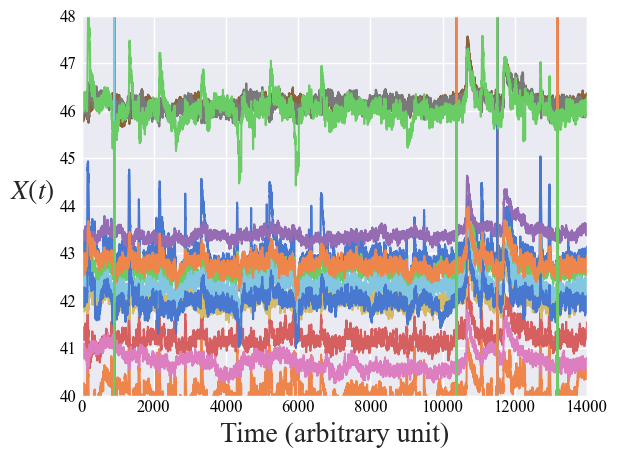

In [140]:
import seaborn as sns
sns.set(style="darkgrid", palette="muted", color_codes=True) 
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['font.size']=14
plt.rcParams['xtick.major.width']=1.0
plt.rcParams['ytick.major.width']=1.0
plt.rcParams['axes.linewidth']=1.0

# plt.rcParams['font.family'] = 'DejaVu Sans' # font familyの設定 
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定 stix
plt.rcParams["font.size"] = 14 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 10 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 10 # 軸だけ変更されます
# plt.rcParams['axes.grid'] = True # make grid
plt.rcParams["legend.fancybox"] = False # 丸角
plt.rcParams["legend.framealpha"] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1 # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.1 # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.1 # 凡例の線と文字の距離の長さ
# plt.rcParams["legend.markerscale"] = 2 # 点がある場合のmarker scale
# plt.style.use('seaborn-colorblind')
# sns.heatmap(df4,cmap="cividis")
# plt.savefig('/content/drive/MyDrive/210713_cormat.eps', bbox_inches="tight", pad_inches=0.05,dpi=350) 
# plt.show()

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
# plt.rcParams["font.size"] = 12                # 文字の大きさ
plt.tick_params(labelsize = 12) 

# plt.spines["top"].set_color("black")
# plt.spines["left"].set_color("black")
# plt.spines["bottom"].set_color("black")
# plt.spines["right"].set_color("black")
plt.tick_params(direction = "in", length = 3, colors = "black")
plt.tick_params(axis="x",which='major', length=5)

for i in range(len(df2.columns)-1):
    plt.plot(df2[df2.columns[i]])
    plt.ylim([40,48])
    
plt.ylabel(r"$X(t)$",rotation=0,fontsize=20,labelpad=20.0)
plt.xlabel("Time (arbitrary unit)",fontsize=20)
plt.xlim([0,14000])
plt.tight_layout()
# plt.savefig("Network_EEG_data.png")
# plt.savefig("Network_EEG_data.eps")
# plt.savefig("Network_EEG_data.svg")
# plt.savefig("Network_EEG_data_dpi300.png",dpi=300)
# plt.savefig("Network_EEG_data_dpi300.eps",dpi=300)
# plt.savefig("Network_EEG_data_dpi300.svg",dpi=300)


plt.show()

In [141]:
print('Results of Dickey-Fuller Examination:')
# dftest = adfuller(df['diff_change'][1:], autolag='AIC')
genelist = list(df.columns)
TS_list, pval_list, lags_list, numobs_list, cri1_list, cri5_list, cri10_list = [],[],[],[],[],[],[]
for i in range(len(df.columns)):
    dftest = adfuller(df[df.columns[i]])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    TS_list.append(dfoutput["Test Statistic"])
    pval_list.append(dfoutput["p-value"])
    lags_list.append(dfoutput["#Lags Used"])
    numobs_list.append(dfoutput["Number of Observations Used"])
    cri1_list.append(dfoutput["Critical Value (1%)"])
    cri5_list.append(dfoutput["Critical Value (5%)"])
    cri10_list.append(dfoutput["Critical Value (10%)"])
    
df_ADF_original = pd.DataFrame({
    "Gene": genelist,
    "Test Statistic" : TS_list,
    "p-value": pval_list,
    "Lags used": lags_list,
    "Number of observations used": numobs_list,
    "Critical Value (1%)": cri1_list,
    "Critical Value (5%)": cri5_list,
    "Critical Value (10%)": cri10_list
});df_ADF_original

Results of Dickey-Fuller Examination:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Mitsu\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Mitsu\AppData\Local\Temp\ipykernel_7980\3117477396.py", line 6, in <module>
    dftest = adfuller(df[df.columns[i]])
             ^^^^^^^^
NameError: name 'adfuller' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mitsu\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mitsu\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mitsu\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line

In [142]:
num_of_var = len(df.columns)

df2,df3,df4 = pd.DataFrame({}), pd.DataFrame({}), pd.DataFrame({})
for i in range(len(genelist)):
    tmp = df[df.columns[i]]
    tmp2 = pd.DataFrame({genelist[i]+"(t)": tmp})
    df2 = pd.concat([df2,tmp2],axis=1)
    
    var = [np.nan]
    for j in range(len(tmp)-1):
        var.append(tmp[j])
    
    tmp2 = pd.DataFrame({genelist[i]+"(t-1)": var})
    df3 = pd.concat([df3,tmp2],axis=1)
    
    tmp = [0.001] * len(df)
    tmp2 = pd.DataFrame({"e"+genelist[i]+"(t)": tmp})
    df4 = pd.concat([df4,tmp2],axis=1)
    
    df5 = pd.concat([df2, df3, df4],axis=1)

df5 = df5.dropna()
dis = df5[df5.columns[0:num_of_var]]
gen = df5.copy()

gen.to_csv("sample_data_"+str(num_of_var)+"_train_gen.csv", sep=",", encoding="utf-8")
gen.to_csv("sample_data_"+str(num_of_var)+"_test_gen.csv", sep=",", encoding="utf-8")
dis.to_csv("sample_data_"+str(num_of_var)+"_train_dis.csv", sep=",", encoding="utf-8")
dis.to_csv("sample_data_"+str(num_of_var)+"_test_dis.csv", sep=",", encoding="utf-8")

## 実験

In [143]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# '-1': CPUに切り替え
# '0' : index 0 のGPUを使う
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import random

from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

torch.manual_seed(0)

In [144]:
# GPU を使用可能か
torch.cuda.is_available()
# PyTorchで使用できるGPUの数
print(torch.cuda.device_count())
# デフォルトのGPU番号（インデックス）
print(torch.cuda.current_device())
# GPU名称
# 引数を省略した場合は、デフォルト（torch.cuda.current_device()が返すインデックス）のGPU
print(torch.cuda.get_device_name())
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_name('cuda:0'))
# CUDAが使用するGPUを設定: 環境変数CUDA_VISIBLE_DEVICES
# CUDA_VISIBLE_DEVICESを0とすると0番のGPUのみ、0, 2とすると0番と2番のGPUのみが使用される。-1とするとすべてのGPUが使用されなくなる。

1
0
NVIDIA GeForce RTX 3060
NVIDIA GeForce RTX 3060
NVIDIA GeForce RTX 3060


In [145]:
# 標準化すると正解率が上がった
def MinMaxNormalizer(q):
    return (q - torch.mean(q))/(torch.std(q))

def MinMaxTensorNormalizer(train_gen):
    tmp = torch.zeros(train_gen.shape)
    for i in range(train_gen.shape[1]):
        tmp[:,i] = MinMaxNormalizer(train_gen[:,i])
    return tmp

In [146]:
def input_data(filename):
    tmp = pd.read_csv(filename, sep=",", encoding="utf-8")
    del tmp["Unnamed: 0"]
    return tmp

def MakeData(patient_arg):
    train_gen = input_data(filename="sample_data_"+str(patient_arg)+"_train_gen.csv")
    train_dis = input_data(filename="sample_data_"+str(patient_arg)+"_train_dis.csv")
    test_gen = input_data(filename="sample_data_"+str(patient_arg)+"_test_gen.csv")
    test_dis = input_data(filename="sample_data_"+str(patient_arg)+"_test_dis.csv")
    # plt.plot(np.linspace(0,len(test_gen[0:100])+1, len(test_gen[0:100])), test_gen.values[0:100])
    # plt.show()
    train_gen = torch.from_numpy(train_gen.values.astype(np.float32)).float()
    train_dis = torch.from_numpy(train_dis.values.astype(np.float32)).float()
    test_gen = torch.from_numpy(test_gen.values.astype(np.float32)).float()
    test_dis = torch.from_numpy(test_dis.values.astype(np.float32)).float()
    # print(train_gen.shape, train_dis.shape, test_gen.shape, test_dis.shape)
    
    train_gen = MinMaxTensorNormalizer(train_gen)
    train_dis = MinMaxTensorNormalizer(train_dis)
    test_gen = MinMaxTensorNormalizer(test_gen)
    test_dis = MinMaxTensorNormalizer(test_dis)
    
    return train_gen, train_dis, test_gen, test_dis

In [147]:
def notears(W, output_dimension): # W は正方行列で要素は整数ではなく実数。整数だとエラー。
    B = torch.mul(W,W)
    matrix_exponential = torch.matrix_exp(B) 
    tmp = torch.trace(matrix_exponential) - output_dimension
    return tmp

In [148]:
def Matrix_decomposition(mat2, output_dimension): # output_dimensionは変数の数
    ##### SEM ###################
    tmp = mat2
    tmp_n = output_dimension 
    tmp2 = tmp[0 : tmp_n] # B0 (contemp matrix)
    tmp2 = torch.triu(tmp2, diagonal = 1) # B0を無理やり上三角行列にするやり方
    tmp3 = tmp[tmp_n : tmp_n * 2] # B1
    tmp4 = tmp[tmp_n * 2 : tmp_n * 3] # Error matrix
    tmp4 = torch.diag(torch.diag(tmp4))
    tmp5 = torch.cat((tmp2, tmp3, tmp4)) # 結局B0,B1には何もしないでエラーだけ対角行列にした行列
    return tmp5

   #### ODE ###############
#     tmp = mat2
#     tmp_n = output_dimension 
#     var = int((mat2.shape[0] - tmp_n)/2) # number of linear + nonlinear variables
#     tmp2 = tmp[0 : tmp_n] # B0 (contemp matrix)
#     tmp2 = torch.triu(tmp2, diagonal = 1) # B0を無理やり上三角行列にするやり方
#     tmp3 = tmp[tmp_n : var * 2] # B0(nonlinear) + B1
#     tmp4 = tmp[var * 2 : var * 2 + tmp_n] # Error matrix
#     tmp4 = torch.diag(torch.diag(tmp4))
#     tmp5 = torch.cat((tmp2, tmp3, tmp4)) # 結局B0,B1には何もしないでエラーだけ対角行列にした行列
#     return tmp5

In [149]:
# def ConditionalLabel(which_variable_generate):
def ConditionalLabelGenerator(which_variable_generate, Time, output_dimension):
    if which_variable_generate == 0:
        noise_vector_label = torch.ones(Time, 1)
    else:
        #noise_vector_label = torch.zeros(Time, 1)
        noise_vector_label = torch.ones(Time, 1)

    #tmp_zeros = torch.zeros(Time, 1)
    tmp_zeros = torch.ones(Time, 1)
    tmp_ones = torch.ones(Time, 1)
    for i in range(1, output_dimension):
        if i == which_variable_generate:
            noise_vector_label = torch.cat((noise_vector_label, tmp_ones),dim=0)
        else:
            noise_vector_label = torch.cat((noise_vector_label, tmp_zeros),dim=0)
            
    return noise_vector_label # ノイズベクトルにつけたのと同じような変数選択のラベルを、正解データに付与するための関数

In [150]:
def MatrixConstraint(tmp):
    tmp = tmp.reshape(output_dimension,input_dimension).T
    return Matrix_decomposition(tmp, output_dimension).T.reshape(output_dimension*input_dimension,1)

In [151]:
def Which_variable_list(iteration, output_dimension):
    tmp = []
    for i in range(iteration):
        tmp.append(i % output_dimension)

    return tmp

In [152]:
def Measurements(coeff_pred, coeff_truth):
    TP,TN,FP,FN=0,0,0,0
    for i in range(coeff_pred.shape[0]):
        for j in range(coeff_pred.shape[1]):
            if coeff_pred[i][j] == coeff_truth[i][j]:
                if coeff_pred[i][j].data.numpy()==1.0:
                    # print("True positive", coeff_pred[i][j])
                    TP += 1
                elif coeff_pred[i][j].data.numpy()==0.0:
                    # print("True negative", coeff_pred[i][j])
                    TN += 1
            else:
                if coeff_pred[i][j].data.numpy()==1.0:
                    # print("False positive", coeff_pred[i][j])
                    FP += 1
                elif coeff_pred[i][j].data.numpy()==0.0:
                    # print("False negative", coeff_pred[i][j])
                    FN += 1

    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP+FN)
    F1 = TP / (TP + 1/2 * (FP + FN))
    MyScore = 1 / ( 1 + (FP + FN) )
    MyScore2 = (FP + FN)  / (TP + FP + FN + TN)
#     print("Accuracy:",Accuracy)
#     print("Precision:",Precision)
#     print("Recall:",Recall)
#     print("F-measure:",F1)
    return Accuracy, Precision, Recall, F1, MyScore, MyScore2

In [153]:
def DTW_Mean(DTW_dict_list):
    DTW_mean_list = []
    for DTW_dict_arg in DTW_dict_list:
        h=0
        tmp = []
        for i in range(len(DTW_dict_arg)):
            if i%2 == 0:
                tmp.append(DTW_dict_arg["x"+str(h)+"_mean"])
                h+=1
        DTW_mean_list.append(sum(tmp)/len(tmp))
    return DTW_mean_list

In [154]:
# 結果にあまり影響なし：outer_iteration, iteration, lr
# 結果に影響：L1/L2/baseline, lambda_notears, lambda_regularizer # NO TEARS 0.1, Regularization 0.1 だと比較的ましになった
# 時系列データによっても予測性能が異なる。すぐに収束していてほとんど平衡状態の曲線だと掴みにくい（？）
# 時系列データがODEsだと、つまり自身の t-1 の時点からの因果効果（係数）が１だと、うまくいく（？）
# Error項のスケールと、係数行列のスケールは同じにする。たとえばError termを大きくしてしまうと、同じデータ点に対して時系列データの占める割合が減ってしまう。
# Error term があまりに小さいとError項を無視してしまう。

In [155]:
num_of_var = 14
train_gen = np.array([pd.Series(tmp).fillna(0.0) for tmp in MakeData(num_of_var)[0].data.numpy()])
train_dis = np.array([pd.Series(tmp).fillna(0.0) for tmp in MakeData(num_of_var)[1].data.numpy()])
test_gen = np.array([pd.Series(tmp).fillna(0.0) for tmp in MakeData(num_of_var)[2].data.numpy()])
test_dis = np.array([pd.Series(tmp).fillna(0.0) for tmp in MakeData(num_of_var)[3].data.numpy()])
train_gen = torch.from_numpy(train_gen).float() # 9 x 17 (Time 9, genes 17)
train_dis = torch.from_numpy(train_dis).float()
test_gen = torch.from_numpy(test_gen).float()
test_dis = torch.from_numpy(test_dis).float()

In [156]:
# method_list = ["baseline", "L1", "L2", "ablation"]
method = 'L2'
# Max_num_of_var = 50
#for method in method_list:
#    os.mkdir(method)
    # Input: Time x coefficient matrix column number (in_features)
    # Output: Time x output_dimension
    # generator(Input, output_dimension)
    # Accuracy_dict, Precision_dict, Recall_dict, F1_dict, MyScore_dict, MyScore2_dict = dict(), dict(), dict(), dict(), dict(), dict()
    # Time_dict = dict()
    # DTW_dict_dict = dict()
    # Coeff_result_mean_dict, Coeff_result_std_dict, Coeff_result_probability_dict = dict(), dict(), dict()
    # for outer_outer_iteration in range(2,Max_num_of_var+1):
num_of_var = 14

# class Generator より上で定義
outer_iteration = 10
output_dimension = num_of_var # number of variables
which_variable_generate = 0 # x0: 0, x1: 1, x2: 2, ...

##### SEM ##########
input_dimension = output_dimension * 3 # coefficient matrix's row
#### ODE (or Nonlinear SEM) ############
# input_dimension = train_gen.shape[1] # coefficient matrix's row

class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.linear1 = torch.nn.Linear(in_features = input_dimension, out_features=output_dimension, bias=False) # output: (noise_frequency * 2) x output_features
        torch.nn.init.uniform_(self.linear1.weight, a=0.5, b=1.0)

    def forward(self, x, output_dimension, input_dimension, which_variable_generate):
        x = self.linear1(x)

        return x

generator = Generator()

tmp = torch.mul(generator.linear1.weight.T.reshape(input_dimension * output_dimension, 1), 
MatrixConstraint(ConditionalLabelGenerator(which_variable_generate, input_dimension, output_dimension)))
    # generator.linear1.weight: 2 x 6  --Transpose--> 6 x 2 --reshape--> 12 x 1
weight_new = torch.nn.Parameter(tmp.reshape(output_dimension, input_dimension)) # tmp 12 x 1 --reshape--> 2 x 6
generator.linear1.weight = weight_new

lr = 0.01
iteration = 500 * num_of_var
lambda_notears = 0.01
lambda_regularizer = 0.01
regularization_setting = method # "baseline", "L1", "L2"
notears_penalty_setting = "with no tears" # "with no tears", "without no tears"
if method == "ablation":
    regularization_setting = "baseline" # "baseline", "L1", "L2"
    notears_penalty_setting = "without no tears" # "with no tears", "without no tears"

generator_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
Generator_loss = torch.nn.MSELoss()

weight_parameter_coeff_matrix_list = []
which_variable_generate_list = Which_variable_list(iteration, output_dimension)
generator_losses = []
time_sta = time.perf_counter()

for outer_iteration_arg in range(outer_iteration): # outer_iteration: bootstrap
    print("outer_iteration_arg: ",outer_iteration_arg)    
    for i in range(iteration):
        which_variable_generate = which_variable_generate_list[i]
        coeff_matrix_row_number = train_gen.shape[1]
        Time = train_dis.shape[0]
        generator_optimizer.zero_grad()  

        train_dis_reshaped = train_dis.T.reshape(train_dis.shape[0] * output_dimension, 1)
        train_dis_reshaped = torch.mul(train_dis_reshaped,
                            ConditionalLabelGenerator(which_variable_generate, train_dis.shape[0], output_dimension))

        Affine = generator(train_gen,  output_dimension, input_dimension, which_variable_generate)

        generator_loss = Generator_loss(Affine, train_dis) # 損失を計算(shapeを揃える)

        coeff_matrix = generator.linear1.weight.T

        if regularization_setting == "baseline":
            pass
        elif regularization_setting == "L1":
            generator_loss += lambda_regularizer * torch.linalg.matrix_norm(coeff_matrix, ord=1)        # 損失を計算(shapeを揃える)
        elif regularization_setting == "L2":
            generator_loss += lambda_regularizer * torch.norm(coeff_matrix, p="fro")     # 損失を計算(shapeを揃える)
        else:
            print("Regularization setting expects 'baseline', 'L1', or 'L2' only.")
            break

        mat3 = coeff_matrix[0 : output_dimension]

        if notears_penalty_setting == "with no tears": # "with no tears", "without no tears"
            half_iteration = int(iteration/2)
            if i <= half_iteration:
                pass
            else:
                generator_loss += (lambda_notears + lambda_notears * (i-half_iteration)/half_iteration) * notears(mat3, output_dimension)
        elif notears_penalty_setting == "without no tears":
            pass
        else:
            print("NO TEARS penalty setting expects 'with no tears', 'without no tears' only.")
            break

        generator_optimizer.zero_grad()
        generator_loss.backward()
        generator_optimizer.step()
        generator_losses.append(generator_loss.item())  

    weight_parameter_coeff_matrix = generator.linear1.weight.T
    weight_parameter_coeff_matrix_list.append(weight_parameter_coeff_matrix)
    if outer_iteration_arg % 5 == 0:
        print("== outer iteration ==", str(outer_iteration_arg),"/",str(outer_iteration))

time_end = time.perf_counter()
tim = time_end- time_sta
Time = tim / outer_iteration

#########################################################################################################################
# 係数行列の平均値 (biasは１ではない)
tmp = torch.zeros(input_dimension, output_dimension)
for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    tmp += weight_parameter_coeff_matrix

result_mean = tmp/outer_iteration

# 係数行列の標準誤差
tmp = torch.zeros(input_dimension, output_dimension)
for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    var = torch.square(weight_parameter_coeff_matrix - result_mean)
    tmp += var

result_std = torch.sqrt(tmp/(outer_iteration-1))

# Probability
# 絶対値がthreshold を超えるか判定
#     threshold_value_candidate = 1000
#     width = torch.max(torch.abs(weight_parameter_coeff_matrix)) - torch.min(torch.abs(weight_parameter_coeff_matrix))

#     hh = tmp2["hh"][0]
#     threshold = width * hh / threshold_value_candidate # This threshold value is very important
thresholding_list = []
threshold = 0.001
for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    tmp = torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), torch.ones(weight_parameter_coeff_matrix.shape))
    thresholding_list.append(tmp)
tmp = torch.zeros(input_dimension, output_dimension)
for i in thresholding_list:
    tmp += i
coeff_pred = tmp/outer_iteration

print("DONE")

outer_iteration_arg:  0
== outer iteration == 0 / 10
outer_iteration_arg:  1
outer_iteration_arg:  2
outer_iteration_arg:  3
outer_iteration_arg:  4
outer_iteration_arg:  5
== outer iteration == 5 / 10
outer_iteration_arg:  6
outer_iteration_arg:  7
outer_iteration_arg:  8
outer_iteration_arg:  9
DONE


In [151]:
# save
# pd.DataFrame({
#       "weight_parameter_coeff_matrix_list": list(weight_parameter_coeff_matrix_list[0].data.numpy())
# }).to_csv("C:/Users/Mitsu/Desktop/AISTATS/real_world_dataset/eegstate/weight_parameter_coeff_matrix_list.txt",sep="\t",encoding="utf-8")

In [119]:
# df_w = pd.read_csv("C:/Users/Mitsu/Desktop/AISTATS/real_world_dataset/eegstate/weight_parameter_coeff_matrix_list.txt",sep="\t",encoding="utf-8")
# del df_w["Unnamed: 0"]
# df_w

,weight_parameter_coeff_matrix_list
0,[ 0.05987861 0.08554488 0.12846324 0.020908...
1,[ 0.07286966 0.15525123 0.150069 -0.028274...
2,[ 0.14758888 0.20571204 0.1075982 -0.169072...
3,[ 0.02144509 -0.03468407 -0.14977245 0.089697...
4,[ 0.04767296 -0.2030782 -0.08539771 0.142299...
5,[ 0.04640587 0.05714297 -0.2065827 -0.076477...
6,[ 0.01909391 -0.03687195 -0.15489398 0.398458...
7,[ 0.02289199 0.18713428 -0.00133778 0.098338...
8,[ 0.3284279 0.08510195 0.12801947 0.029884...
9,[-0.04285137 0.20754881 0.00429258 -0.225450...


In [120]:
# def String2List(coeff_pred_prob):
#     tmp = coeff_pred_prob.replace("[ ","").replace("[","").replace("]","").replace("\n","").split(" ") # .split("[[")[1].split("]]")[0]
# #     tmp[0] = tmp[0].replace("[[","[")
# #     tmp[-1] = tmp[-1].replace("]]","]")
#     return [float(var) for var in tmp if var != ""]

In [121]:
# weight_parameter_coeff_matrix_list = []
# for i in range(len(df_w)):
#     tmp = df_w[df_w.columns[0]][i]
#     weight_parameter_coeff_matrix_list.append(String2List(tmp))

In [122]:
# weight_parameter_coeff_matrix_list2 = torch.tensor(weight_parameter_coeff_matrix_list)

In [123]:
# weight_parameter_coeff_matrix_list2

tensor([[ 5.9879e-02,  8.5545e-02,  1.2846e-01,  2.0908e-02,  5.1194e-02,
          7.1534e-02,  1.9296e-02,  2.4365e-02,  3.3038e-01, -3.8300e-02,
          1.5091e-01, -1.7611e-01,  3.2657e-01,  7.5051e-02],
        [ 7.2870e-02,  1.5525e-01,  1.5007e-01, -2.8274e-02, -2.0166e-01,
          6.1617e-02, -2.8999e-02,  2.2304e-01,  7.1826e-02,  2.0574e-01,
          6.9592e-02,  1.6897e-01,  5.7694e-02,  5.5674e-02],
        [ 1.4759e-01,  2.0571e-01,  1.0760e-01, -1.6907e-01, -9.1479e-02,
         -2.9170e-01, -1.7170e-01,  2.3116e-02,  1.4450e-01,  3.0180e-02,
          1.1534e-01,  1.2851e-01,  1.4845e-01, -3.0178e-01],
        [ 2.1445e-02, -3.4684e-02, -1.4977e-01,  8.9697e-02,  1.5886e-01,
         -2.0544e-02,  3.9758e-01,  1.0755e-01,  2.5053e-02, -2.3631e-01,
          1.4855e-01,  2.5974e-01,  6.2140e-03,  6.3226e-02],
        [ 4.7673e-02, -2.0308e-01, -8.5398e-02,  1.4230e-01,  1.6334e-01,
          1.8364e-01,  1.4151e-01, -1.9707e-01,  4.0842e-02, -1.0854e-01,
          1.

In [134]:
# tmp =torch.zeros(14)
# for i in weight_parameter_coeff_matrix_list2:
#     tmp +=i
# tmp / len(weight_parameter_coeff_matrix_list2)

tensor([0.0243, 0.0249, 0.0184, 0.0198, 0.0237, 0.0196, 0.0197, 0.0269, 0.0234,
        0.0189, 0.0276, 0.0226, 0.0221, 0.0238])

In [159]:
# Probability
# 絶対値がthreshold を超えるか判定
thresholding_list = []
threshold = 0.1
output_dimension = 14
input_dimension = output_dimension * 3
outer_iteration = 10

for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    tmp = torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), torch.ones(weight_parameter_coeff_matrix.shape))
    thresholding_list.append(tmp)

tmp = torch.zeros(input_dimension, output_dimension)
for i in thresholding_list:
    tmp += i

#     coeff_pred = tmp/outer_iteration

# for hh in range(threshold_value_candidate):
#     threshold = torch.min(torch.abs(weight_parameter_coeff_matrix)) + width * hh / threshold_value_candidate # This threshold value is very important
#     thresholding_list = []
#     for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
#         # torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), weight_parameter_coeff_matrix)
#         tmp = torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), torch.ones(weight_parameter_coeff_matrix.shape))
#         thresholding_list.append(tmp)

#     tmp = torch.zeros(input_dimension, output_dimension)
#     for i in thresholding_list:
#         tmp += i

coeff_pred = tmp/outer_iteration;coeff_pred
coeff_pred

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
        [1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
        [0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
        [0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.],
        [1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0

In [97]:
coeff_pred.shape

torch.Size([42, 14])

## COVID-19 real data

In [722]:
os.chdir("C:/Users/Mitsu/Desktop/AISTATS/real_world_dataset")
df = pd.read_csv("sachs.csv", sep=",", encoding="utf-8")
del df["Unnamed: 0"]
df

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.20,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.90,40.00
1,35.9,16.50,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.50,61.50
2,59.4,44.10,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.90,19.50
3,73.0,82.80,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.60,23.10
4,33.7,19.80,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.70,81.30
...,...,...,...,...,...,...,...,...,...,...,...
7461,49.1,12.40,32.80,27.90,22.70,11.70,38.2,1144.0,1.00,2.55,1.00
7462,23.3,4.61,17.80,22.10,14.90,48.70,67.3,922.0,1.00,9.82,1.00
7463,28.1,4.49,18.80,20.20,10.20,3.08,21.9,730.0,1.00,1.75,2.00
7464,34.6,7.10,5.73,20.70,15.10,32.20,41.4,813.0,44.50,1382.00,2.44


In [723]:
from statsmodels.tsa.seasonal import STL

In [724]:
df_stl_1 = pd.DataFrame({})
df_stl_2 = pd.DataFrame({})
for i in range(len(df.columns)):
    stl=STL(df[df.columns[i]], period=3, robust=True)
    stl_series = stl.fit()
    # stl_series.plot()
    # plt.show()
    # STL分解結果のデータ
    # stl_o = stl_series.observed #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
    stl_t = stl_series.trend    #トレンド（trend）
    stl_s = stl_series.seasonal #季節性（seasonal）
    stl_r = stl_series.resid    #残差（resid）

    tmp = pd.DataFrame({df.columns[i]: stl_t + stl_s})
    df_stl_1 = pd.concat([df_stl_1, tmp], axis=1)
    tmp = pd.DataFrame({"error_"+df.columns[i]: stl_r})
    df_stl_2 = pd.concat([df_stl_2, tmp], axis=1)

In [725]:
num_of_var = len(df_stl_1.columns)
df_stl_3 = df_stl_1[1:]
df_stl_3 = df_stl_3.reset_index()
del df_stl_3["index"]
df_stl_4 = pd.concat([df_stl_3, df_stl_1], axis=1).dropna()

tmp = []
for i in range(num_of_var):
    tmp.append(df_stl_4.columns[i]+"(t)")
for i in range(num_of_var):
    tmp.append(df_stl_4.columns[i]+"(t-1)")

df_stl_4.columns = tmp

df5 = pd.concat([df_stl_4, df_stl_2], axis=1).dropna()
df5.to_csv("sample_data_"+str(num_of_var)+"_train_gen.csv",sep=",", encoding="utf-8")
df5.to_csv("sample_data_"+str(num_of_var)+"_test_gen.csv",sep=",", encoding="utf-8")
df6 = df5[df5.columns[0:num_of_var]]
df6.to_csv("sample_data_"+str(num_of_var)+"_train_dis.csv",sep=",", encoding="utf-8")
df6.to_csv("sample_data_"+str(num_of_var)+"_test_dis.csv",sep=",", encoding="utf-8")

num of var: 11
== outer iteration == 0 / 10
== outer iteration == 5 / 10


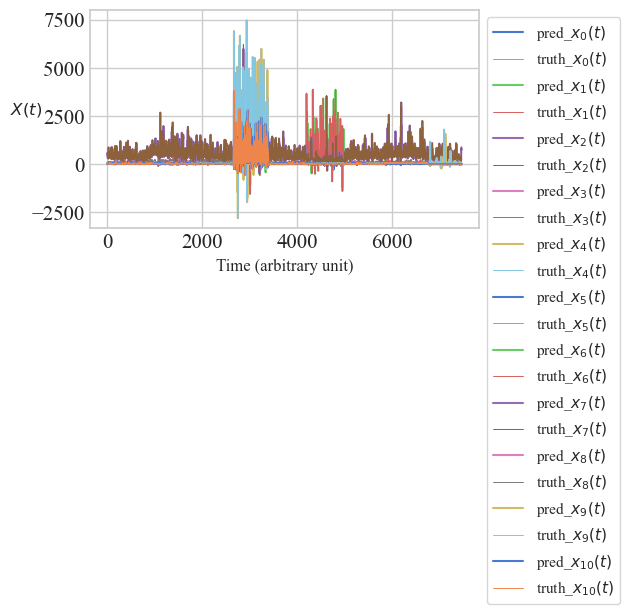

DONE


In [763]:
# Input: Time x coefficient matrix column number (in_features)
# Output: Time x output_dimension
# generator(Input, output_dimension)

Accuracy_dict, Precision_dict, Recall_dict, F1_dict, MyScore_dict, MyScore2_dict = dict(), dict(), dict(), dict(), dict(), dict()
Time_dict = dict()
DTW_dict_dict = dict()
Coeff_result_mean_dict, Coeff_result_std_dict, Coeff_result_probability_dict = dict(), dict(), dict()

num_of_var = len(df_stl_1.columns)
print("num of var:",num_of_var)

train_gen, train_dis, test_gen, test_dis = MakeData(num_of_var)
# class Generator より上で定義
outer_iteration = 10
output_dimension = train_dis.shape[1] # number of variables
which_variable_generate = 0 # x0: 0, x1: 1, x2: 2, ...
Time = train_dis.shape[0]

##### SEM ##########
input_dimension = output_dimension * 3 # coefficient matrix's row
#### ODE (or Nonlinear SEM) ############
# input_dimension = train_gen.shape[1] # coefficient matrix's row

class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.linear1 = torch.nn.Linear(in_features = input_dimension, out_features=output_dimension, bias=False) # output: (noise_frequency * 2) x output_features
        torch.nn.init.uniform_(self.linear1.weight, a=0.5, b=1.0)

    def forward(self, x, output_dimension, input_dimension, which_variable_generate, Time):
        x = self.linear1(x)

        return x

generator = Generator()

tmp = torch.mul(generator.linear1.weight.T.reshape(input_dimension * output_dimension, 1), 
MatrixConstraint(ConditionalLabelGenerator(which_variable_generate, input_dimension, output_dimension)))
    # generator.linear1.weight: 2 x 6  --Transpose--> 6 x 2 --reshape--> 12 x 1
weight_new = torch.nn.Parameter(tmp.reshape(output_dimension, input_dimension)) # tmp 12 x 1 --reshape--> 2 x 6
generator.linear1.weight = weight_new

# print(generator)
# print(generator.linear1.weight.T)

# Sample 
# Time = 10
# tmp1 = torch.randn(Time, input_dimension)
# Affine = generator(tmp1,  output_dimension, input_dimension, which_variable_generate, Time)
# print("NNへの入力シグマ：", tmp1)
# print("NNの出力（データ）：", Affine)
# print("重み（係数）行列（グザイ予測値）: ",generator.linear1.weight.T)
# たしかに、tmp （入力）に、重み num_of_var (output_dimension) x coeff matrix row の転値を行列積すると出力Affineになる。
##############################################################################################################################

lr = 0.01
#     iteration = 1000
iteration = 500 * num_of_var
lambda_notears = 10.0
lambda_regularizer = 0.01
regularization_setting = "baseline" # "baseline", "L1", "L2"
notears_penalty_setting = "with no tears" # "with no tears", "without no tears"

generator_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
Generator_loss = torch.nn.MSELoss()

weight_parameter_coeff_matrix_list = []
which_variable_generate_list = Which_variable_list(iteration, output_dimension)
generator_losses = []
time_sta = time.perf_counter()
coeff_matrix_row_number = train_gen.shape[1]

for outer_iteration_arg in range(outer_iteration):
    for i in range(iteration):
        which_variable_generate = which_variable_generate_list[i]

        generator_optimizer.zero_grad()  

        train_dis_reshaped = train_dis.T.reshape(train_dis.shape[0] * output_dimension, 1)
        train_dis_reshaped = torch.mul(train_dis_reshaped,
                            ConditionalLabelGenerator(which_variable_generate, train_dis.shape[0], output_dimension))

        Affine = generator(train_gen,  output_dimension, input_dimension, which_variable_generate, Time)

        generator_loss = Generator_loss(Affine, train_dis) # 損失を計算(shapeを揃える)

        coeff_matrix = generator.linear1.weight.T

        if regularization_setting == "baseline":
            pass
        elif regularization_setting == "L1":
            generator_loss += lambda_regularizer * torch.linalg.matrix_norm(coeff_matrix, ord=1)        # 損失を計算(shapeを揃える)
        elif regularization_setting == "L2":
            generator_loss += lambda_regularizer * torch.norm(coeff_matrix, p="fro")     # 損失を計算(shapeを揃える)
        else:
            print("Regularization setting expects 'baseline', 'L1', or 'L2' only.")
            break

        mat3 = coeff_matrix[0 : output_dimension]

        if notears_penalty_setting == "with no tears": # "with no tears", "without no tears"
            half_iteration = int(iteration/2)
            if i <= half_iteration:
                pass
            else:
                generator_loss += (lambda_notears + lambda_notears * (i-half_iteration)/half_iteration) * notears(mat3, output_dimension)
        elif notears_penalty_setting == "without no tears":
            pass
        else:
            print("NO TEARS penalty setting expects 'with no tears', 'without no tears' only.")
            break

        generator_optimizer.zero_grad()
        generator_loss.backward()
        generator_optimizer.step()
        generator_losses.append(generator_loss.item())  
#         if i % 500 == 0:
#             print(i,"/",iteration)

    weight_parameter_coeff_matrix = generator.linear1.weight.T
    weight_parameter_coeff_matrix_list.append(weight_parameter_coeff_matrix)
    if outer_iteration_arg % 5 == 0:
        print("== outer iteration ==", str(outer_iteration_arg),"/",str(outer_iteration))

time_end = time.perf_counter()
tim = time_end- time_sta
Time_dict["x"+str(num_of_var)] = tim / outer_iteration

# 係数行列の平均値 (biasは１ではない)
tmp = torch.zeros(input_dimension, output_dimension)
for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    tmp += weight_parameter_coeff_matrix

result_mean = tmp/outer_iteration
Coeff_result_mean_dict["x"+str(num_of_var)] = result_mean

# 係数行列の標準誤差
tmp = torch.zeros(input_dimension, output_dimension)
for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    var = torch.square(weight_parameter_coeff_matrix - result_mean)
    tmp += var

result_std = torch.sqrt(tmp/(outer_iteration-1))
Coeff_result_std_dict["x"+str(num_of_var)] = result_std

# DTW: Stan Salvador, and Philip Chan. “FastDTW: Toward accurate dynamic time warping in linear time and space.” Intelligent Data Analysis 11.5 (2007): 561-580.

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 10                 # 文字の大きさ
plt.tick_params(labelsize = 15) 
plt.xlabel("Time (arbitrary unit)")
plt.ylabel(r"$X(t)$",rotation=0)

DTW_dict = dict()
for i in range(num_of_var):
    DTW_x0_list = []
    for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
        mat2 = weight_parameter_coeff_matrix

        Affine = generator(test_gen,  output_dimension, input_dimension, which_variable_generate=i, Time=test_gen.shape[0])
        pred_x0 = Affine.data.numpy()[:,i]
        truth_x0 = test_dis.data.numpy()[:,i]

        distance, path = fastdtw(pred_x0.reshape(-1, 1), truth_x0.reshape(-1,1), dist=euclidean)
        DTW_x0_list.append(distance)

    DTW_dict["x"+str(i)+"_mean"] = np.mean(DTW_x0_list)
    DTW_dict["x"+str(i)+"_std"] = np.std(DTW_x0_list)

    # 動的挙動
    width = int(len(pred_x0))
    plt.plot(np.linspace(0,width-1,width),pred_x0[0:width], label=r"pred_$x_{"+str(i)+"}(t)$")
    plt.plot(np.linspace(0,width-1,width),truth_x0[0:width],linewidth=0.7, label=r"truth_$x_{"+str(i)+"}(t)$")

DTW_dict_dict["x"+str(num_of_var)] = DTW_dict
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.savefig("sample_data_"+str(num_of_var)+"_prediction.svg")
plt.savefig("sample_data_"+str(num_of_var)+"_prediction.png")
plt.show()

print("DONE")

In [815]:
# Probability
# 絶対値がthreshold を超えるか判定
thresholding_list = []
threshold = 0.005

for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    tmp = torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), torch.ones(weight_parameter_coeff_matrix.shape))
    thresholding_list.append(tmp)

tmp = torch.zeros(input_dimension, output_dimension)
for i in thresholding_list:
    tmp += i

#     coeff_pred = tmp/outer_iteration

# for hh in range(threshold_value_candidate):
#     threshold = torch.min(torch.abs(weight_parameter_coeff_matrix)) + width * hh / threshold_value_candidate # This threshold value is very important
#     thresholding_list = []
#     for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
#         # torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), weight_parameter_coeff_matrix)
#         tmp = torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), torch.ones(weight_parameter_coeff_matrix.shape))
#         thresholding_list.append(tmp)

#     tmp = torch.zeros(input_dimension, output_dimension)
#     for i in thresholding_list:
#         tmp += i

coeff_pred = tmp/outer_iteration;coeff_pred

tensor([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.],
        [1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.],
        [1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,

## Network

In [816]:
# adj_matrix = coeff_pred[0:num_of_var].data.numpy()
# adj_matrix = coeff_pred[num_of_var:num_of_var*2].data.numpy()

In [817]:
# DTW_dict_dict["x"+str(17)], Time_dict["x"+str(17)]

In [818]:
# DTW_mean_list = DTW_Mean(DTW_dict_list);DTW_mean_list

In [160]:
scl = 1 # scale
pos = {
"AF3": (-34.534*scl,305.753*scl),
"F7": (-80.627*scl,150.660*scl),
"F3": (-15.234*scl,170.326*scl),
"FC5": (-50.052*scl,66.3*scl),
"T7": (-100.0*scl,0.2620*scl),
"P7": (-60.052*scl,-145.107*scl),
"O1": (-22.234*scl,-200.723*scl),
"O2": (22.234*scl,-200.723*scl),
"P8": (60.052*scl,-145.107*scl),
"T8": (100.0*scl,0.2620*scl),
"FC6": (50.052*scl,66.3*scl),
"F4": (15.234*scl,170.326*scl),
"F8": (80.627*scl,150.660*scl),
"AF4": (34.534*scl,305.753*scl)
}
# https://apps.automeris.io/wpd/ Webplot digitizer

In [161]:
import networkx as nx

In [212]:
thresholding_list = []
threshold = 0.3
for weight_parameter_coeff_matrix in weight_parameter_coeff_matrix_list:
    tmp = torch.where(torch.abs(weight_parameter_coeff_matrix) <= threshold, torch.tensor(0.0), torch.ones(weight_parameter_coeff_matrix.shape))
    thresholding_list.append(tmp)
tmp = torch.zeros(input_dimension, output_dimension)
for i in thresholding_list:
    tmp += i
coeff_pred = tmp/outer_iteration
print(coeff_pred)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0

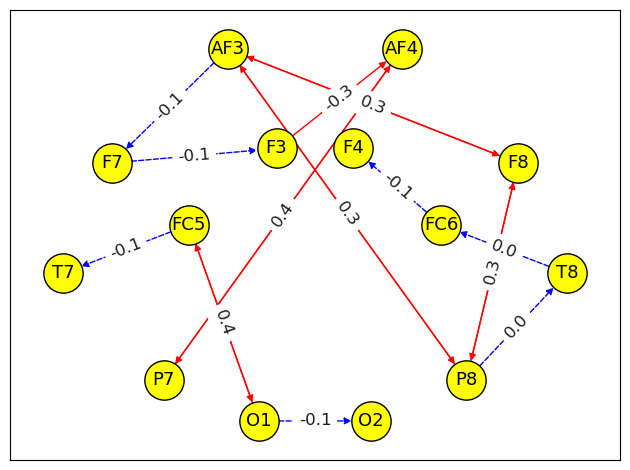

In [225]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

######### DD #################################
# sns.set_style('whitegrid')
num_of_var = 15
df = input_data(filename="sample_data_"+str(num_of_var)+"_train_dis.csv")
df = df[df.columns[0:-1]]
G = nx.DiGraph()
################################################################################
coeff_pred_prob = coeff_pred.data.numpy()

B0_pred = coeff_pred_prob[0:num_of_var]
B1_pred = coeff_pred_prob[num_of_var:num_of_var*2]

G.clear()
G = nx.DiGraph()

nodelist = [gene.replace("(t)","") for gene in df.columns]
# nodelist2 = []
# for node in nodelist:
#     if node in ["AF3","FC5","T7","P7","O1","AF4","F8"]:
#         nodelist2.append((node, {"color":"red"}))
#     elif node in ["F3","F7","O2","P8","T8","FC6","F4"]:
#         nodelist2.append((node, {"color":"blue"}))
G.add_nodes_from(nodelist)


B0_edge_list = []
for i in range(len(B0_pred)):
    for j in range(len(B0_pred[i])):
        if  B0_pred[i][j] >= 0.01 :
            B0_edge_list.append( (nodelist[i], nodelist[j], {'weight':round(float(result_mean[i][j].data.numpy()),1), "color" : "red", "style": "solid"} ) )

B1_edge_list = []
for i in range(len(B1_pred)):
    for j in range(len(B1_pred[i])):
        if  B1_pred[i][j] >= 0.01 :
            B1_edge_list.append( (nodelist[i], nodelist[j], {'weight':round(float(result_mean[i+14][j].data.numpy()),1), "color" : "blue", "style": "dashed"} ) )


G.add_edges_from(B0_edge_list)
G.add_edges_from(B1_edge_list)

plt.rcParams["font.family"] = "Arial"
#To view the directed graph run the following command
# pos = nx.circular_layout(G, scale=1, center=None, dim=2)
edge_color = [edge["color"] for edge in G.edges.values()]
edge_style = [edge["style"] for edge in G.edges.values()]
nx.draw_networkx(G, pos, font_size=13, font_color="black", 
                 node_color="yellow",edgecolors="black", linewidths=1.0,
                 style=edge_style, edge_color=edge_color, 
                 with_labels = True, node_size=800,width=1)
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels,font_size=12)
plt.grid(False)
plt.tight_layout()
# plt.savefig("Network_EEG_DD_yellow.png")
# plt.savefig("Network_EEG_DD_yellow.eps")
# plt.savefig("Network_EEG_DD_yellow.svg")
# plt.savefig("Network_EEG_DD_dpi300_yellow.png",dpi=300)
# plt.savefig("Network_EEG_DD_dpi300_yellow.eps",dpi=300)
# plt.savefig("Network_EEG_DD_dpi300_yellow.svg",dpi=300)

plt.show()

In [178]:
nodelist

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [183]:
df2.columns

Index(['AF3(t)', 'F7(t)', 'F3(t)', 'FC5(t)', 'T7(t)', 'P7(t)', 'O1(t)',
       'O2(t)', 'P8(t)', 'T8(t)', 'FC6(t)', 'F4(t)', 'F8(t)', 'AF4(t)'],
      dtype='object')

In [207]:
AF3_,F7_,F3_,FC5_,T7_,P7_,O1_,O2_,P8_,T8_,FC6_,F4_,F8_,AF4_=[],[],[],[],[],[],[],[],[],[],[],[],[],[]
tmp = result_mean.data.numpy()
for i in range(len(tmp)):
        AF3_.append(round(tmp[i][0],3))
        F7_.append(round(tmp[i][1],3))
        F3_.append(round(tmp[i][2],3))
        FC5_.append(round(tmp[i][3],3))
        T7_.append(round(tmp[i][4],3))
        P7_.append(round(tmp[i][5],3))
        O1_.append(round(tmp[i][6],3))
        O2_.append(round(tmp[i][7],3))
        P8_.append(round(tmp[i][8],3))
        T8_.append(round(tmp[i][9],3))
        FC6_.append(round(tmp[i][10],3))
        F4_.append(round(tmp[i][11],3))
        F8_.append(round(tmp[i][12],3))
        AF4_.append(round(tmp[i][13],3))

In [208]:
pd.DataFrame({
    "AF3" : AF3_,
    'F7' : F7_,
    'F3' : F3_,
    'FC5' : FC5_,
    'T7' : T7_,
    'P7' : P7_,
    'O1' : O1_,
    'O2' : O2_,
    'P8' : P8_,
    'T8' : T8_,
    'FC6' : FC6_,
    'F4' : F4_,
    'F8' : F8_,
    'AF4' : AF4_
# }).to_csv("Result_mean_03.csv",sep=",",encoding="utf-8")

* http://ehrai.com/su/pdf/aihls2013.pdf (ノードのふちの色)

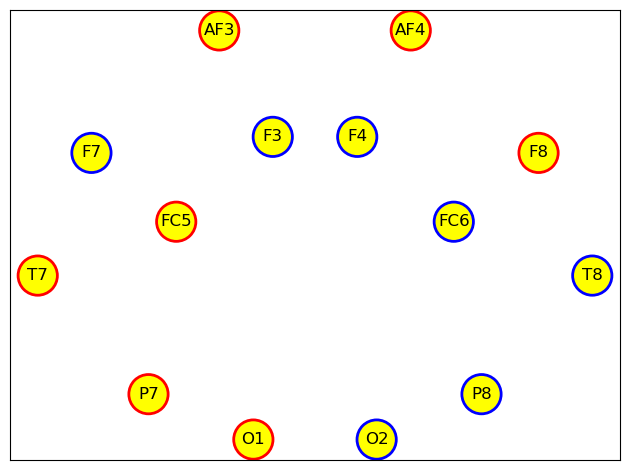

DONE


In [388]:
# KB
# https://apps.automeris.io/wpd/ Webplot digitizer
num_of_var = 15
df = input_data(filename="sample_data_"+str(num_of_var)+"_train_dis.csv")
df = df[df.columns[0:-1]]
G = nx.DiGraph()
################################################################################
coeff_pred_prob = coeff_pred.data.numpy()

B0_pred = coeff_pred_prob[0:num_of_var]
B1_pred = coeff_pred_prob[num_of_var:num_of_var*2]

G.clear()
G = nx.DiGraph()

nodelist = [gene.replace("(t)","") for gene in df.columns]
nodelist2 = []
for node in nodelist:
    if node in ["AF3","FC5","T7","P7","O1","AF4","F8"]:
        nodelist2.append((node, {"color":"red"}))
    elif node in ["F3","F7","O2","P8","T8","FC6","F4"]:
        nodelist2.append((node, {"color":"blue"}))
G.add_nodes_from(nodelist2)


# B0_edge_list = []
# for i in range(len(B0_pred)):
#     for j in range(len(B0_pred[i])):
#         if  B0_pred[i][j] >= 0.01 :
#             B0_edge_list.append((nodelist[i], nodelist[j], {"color" : "black", "style": "solid"}))

# B1_edge_list = []
# for i in range(len(B1_pred)):
#     for j in range(len(B1_pred[i])):
#         if  B1_pred[i][j] >= 0.01 :
#             B1_edge_list.append((nodelist[i], nodelist[j], {"color" : "black", "style": "dashed"}))

# G.add_edges_from(B0_edge_list)
# G.add_edges_from(B1_edge_list)



plt.rcParams["font.family"] = "Arial"
#To view the directed graph run the following command
# pos = nx.circular_layout(G, scale=1, center=None, dim=2)
# edge_color = [edge["color"] for edge in G.edges.values()]
# edge_style = [edge["style"] for edge in G.edges.values()]
node_color = [node["color"] for node in G.nodes.values()]
nx.draw_networkx(G, pos, font_size=12, font_color="black", 
                 node_color="yellow",edgecolors=node_color, linewidths=2.0,
#                  style=edge_style, edge_color=edge_color, 
                 with_labels = True, node_size=800,width=1)


plt.tight_layout()
# plt.savefig("Network_EEG_KB.png")
# plt.savefig("Network_EEG_KB.eps")
# plt.savefig("Network_EEG_KB.svg")
# plt.savefig("Network_EEG_KB_dpi300.png",dpi=300)
# plt.savefig("Network_EEG_KB_dpi300.eps",dpi=300)
# plt.savefig("Network_EEG_KB_dpi300.svg",dpi=300)

# plt.savefig("Network_EEG_KB_transparent.png",transparent=True)
# plt.savefig("Network_EEG_KB_transparent.eps",transparent=True)
# plt.savefig("Network_EEG_KB_transparent.svg",transparent=True)
# plt.savefig("Network_EEG_KB_dpi300_transparent.png",dpi=300,transparent=True)
# plt.savefig("Network_EEG_KB_dpi300_transparent.eps",dpi=300,transparent=True)
# plt.savefig("Network_EEG_KB_dpi300_transparent.svg",dpi=300,transparent=True)

plt.show()
 
print("DONE")

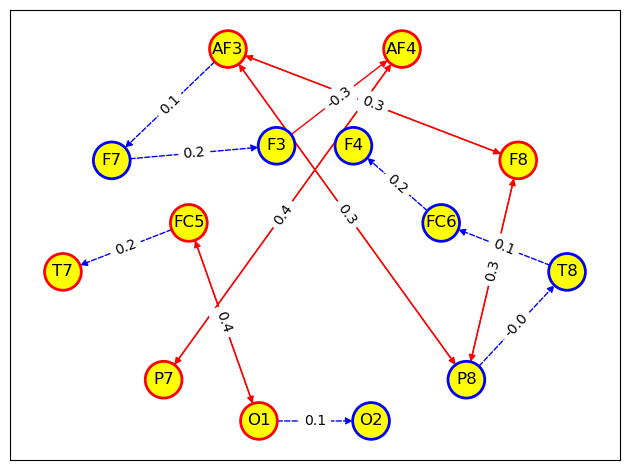

DONE


In [389]:
# DD-KB
num_of_var = 15
df = input_data(filename="sample_data_"+str(num_of_var)+"_train_dis.csv")
df = df[df.columns[0:-1]]
G = nx.DiGraph()
################################################################################
coeff_pred_prob = coeff_pred.data.numpy()

B0_pred = coeff_pred_prob[0:num_of_var]
B1_pred = coeff_pred_prob[num_of_var:num_of_var*2]

G.clear()
G = nx.DiGraph()

nodelist = [gene.replace("(t)","") for gene in df.columns]
nodelist2 = []
for node in nodelist:
    if node in ["AF3","FC5","T7","P7","O1","AF4","F8"]:
        nodelist2.append((node, {"color":"red"}))
    elif node in ["F3","F7","O2","P8","T8","FC6","F4"]:
        nodelist2.append((node, {"color":"blue"}))
G.add_nodes_from(nodelist2)

B0_edge_list = []
for i in range(len(B0_pred)):
    for j in range(len(B0_pred[i])):
        if  B0_pred[i][j] >= 0.01 :
            B0_edge_list.append( (nodelist[i], nodelist[j], {'weight':round(float(result_mean[i][j].data.numpy()),1), "color" : "red", "style": "solid"} ) )

B1_edge_list = []
for i in range(len(B1_pred)):
    for j in range(len(B1_pred[i])):
        if  B1_pred[i][j] >= 0.01 :
            B1_edge_list.append( (nodelist[i], nodelist[j], {'weight':round(float(result_mean[i][j].data.numpy()),1), "color" : "blue", "style": "dashed"} ) )


G.add_edges_from(B0_edge_list)
G.add_edges_from(B1_edge_list)

plt.rcParams["font.family"] = "Arial"
#To view the directed graph run the following command
# pos = nx.circular_layout(G, scale=1, center=None, dim=2)
edge_color = [edge["color"] for edge in G.edges.values()]
edge_style = [edge["style"] for edge in G.edges.values()]
nx.draw_networkx(G, pos, font_size=12, font_color="black", 
                 node_color="yellow",edgecolors=node_color, linewidths=2.0,
                 style=edge_style, edge_color=edge_color, 
                 with_labels = True, node_size=700,width=1)
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels,font_size=10)

plt.tight_layout()
# plt.savefig("Network_EEG_DDKB.png")
# plt.savefig("Network_EEG_DDKB.eps")
# plt.savefig("Network_EEG_DDKB.svg")
# plt.savefig("Network_EEG_DDKB_dpi300.png",dpi=300)
# plt.savefig("Network_EEG_DDKB_dpi300.eps",dpi=300)
# plt.savefig("Network_EEG_DDKB_dpi300.svg",dpi=300)
plt.show()
 
print("DONE")

* https://signor.uniroma2.it/covid/covidViewer.php?network=SIGNOR-SCIR
* https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE190001
* 新型コロナウイルス感染症（COVID-19）mRNAワクチン接種に対する反応を調査しました。23人の被験者からなるコホートを募集し、初回免疫ワクチン接種後および追加免疫ワクチン接種後の9日間、RNA配列決定によって血液転写産物量の変化を毎日測定した。カスタムマルチプレックスアッセイを使用して、ワクチン接種後 7 日目と 14 日目に抗体反応を測定しました。初回投与量と追加投与量に対する反応の間には顕著な差が観察されました。後者は、急性ウイルス性呼吸器感染症の患者で見られるものと一致する、血液転写産物量の広範な変化を引き起こします。
<a name="kb"></a>

In [77]:
# df_relation = pd.read_csv("C:/Users/Mitsu/Desktop/AISTATS/COVID_logitudinal/relations_result_22_09_23.tsv",sep="\t",encoding="utf-8",\
#             usecols=["ENTITYA","ENTITYB","EFFECT"]);df_relation 
df_relation = pd.read_csv("C:/Users/Mitsu/Desktop/AISTATS/COVID_logitudinal/relations_result_01_10_23.tsv",sep="\t",encoding="utf-8",\
            usecols=["ENTITYA","ENTITYB","EFFECT"]);df_relation # MAPK

,ENTITYA,ENTITYB,EFFECT
0,TRAF6,MAP3K7,up-regulates activity
1,DDIT3,Apoptosis,up-regulates
2,ERK1/2,AP1,up-regulates
3,TGFBR1,TRAF6,up-regulates activity
4,Host translation inhibitor nsp1,Apoptosis,up-regulates
...,...,...,...
54,ATF2,IL6,up-regulates
55,IL6,Inflammation,up-regulates
56,ERK1/2,ATF2,up-regulates
57,CREB1,Proliferation,up-regulates


In [83]:
patient_arg = 1
df = input_data(filename="C:/Users/Mitsu/Desktop/AISTATS/COVID_logitudinal/covid_data_diff/MAPK_covid_sample_data_"+str(patient_arg)+"_train_dis.csv")
nodelist = [gene.replace("(t)","") for gene in df.columns]
relations = df_relation[(df_relation["ENTITYA"].isin(nodelist))&(df_relation["ENTITYB"].isin(nodelist))].drop_duplicates().reset_index()
del relations["index"]
edge_list = []
for relation in range(len(relations)):
    edge_list.append((relations["ENTITYA"][relation], relations["ENTITYB"][relation], {"color":"black"}))

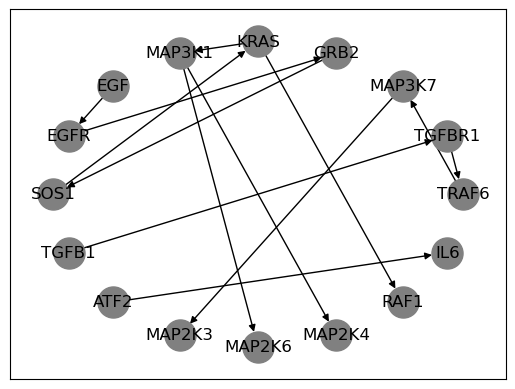

DONE


In [85]:
G.clear()
G = nx.DiGraph()
nodelist2 = list(pd.concat([relations["ENTITYA"],relations["ENTITYB"]]).drop_duplicates())
G.add_nodes_from(nodelist2)

G.add_edges_from(edge_list)

plt.rcParams["font.family"] = "Arial"
#To view the directed graph run the following command
pos = nx.circular_layout(G, scale=1, center=None, dim=2)
edge_color = [edge["color"] for edge in G.edges.values()]
nx.draw_networkx(G, pos, font_size=12, font_color="black", node_color="grey", edge_color=edge_color, with_labels = True, node_size=500,width=1)

plt.savefig("MAPK_Network_KnowledgeBased_"+str(num_of_var)+".png")
plt.savefig("MAPK_Network_KnowledgeBased_"+str(num_of_var)+".eps")
plt.savefig("MAPK_Network_KnowledgeBased_"+str(num_of_var)+".svg")
plt.savefig("MAPK_Network_KnowledgeBased_"+str(num_of_var)+"_dpi300.png",dpi=300)
plt.savefig("MAPK_Network_KnowledgeBased_"+str(num_of_var)+"_dpi300.eps",dpi=300)
plt.savefig("MAPK_Network_KnowledgeBased_"+str(num_of_var)+"_dpi300.svg",dpi=300)
plt.show()
 
print("DONE")

In [72]:
EntityA_list, EntityB_list = [],[]
for edge in B0_edge_list:
    EntityA_list.append(edge[0])
    EntityB_list.append(edge[1])
for edge in B1_edge_list:
    EntityA_list.append(edge[0])
    EntityB_list.append(edge[1])

df_relation_KB = df_relation.copy()
df_relation_KB["ID_KB"] = ["ID_"+str(i) for i in range(len(df_relation_KB))]
df_relation_DD = pd.DataFrame({
    "ENTITYA": EntityA_list,
    "ENTITYB": EntityB_list,
    "ID_DD": ["ID_"+str(i) for i in range(len(EntityA_list))]
})
df_relation_DD

,ENTITYA,ENTITYB,ID_DD
0,KPNA2,TICAM1,ID_0
1,KPNA2,TBK1,ID_1
2,KPNA2,TRAF6,ID_2
3,KPNA2,TRAF3,ID_3
4,MYD88,TICAM1,ID_4
5,MYD88,TBK1,ID_5
6,MYD88,TRAF6,ID_6
7,MYD88,TRAF3,ID_7
8,MYD88,IRF3,ID_8
9,MYD88,RIPK1,ID_9


In [67]:
df_relation_KB

,ENTITYA,ENTITYB,EFFECT,ID_KB
0,NLRP3 inflammasome,Caspase 1 complex,up-regulates activity,ID_0
1,TBK1,AKT,up-regulates,ID_1
2,PAMPs,TLRs,up-regulates,ID_2
3,KPNA2,IRF3,up-regulates activity,ID_3
4,RIPK1,IKK-complex,up-regulates activity,ID_4
5,Caspase 1 complex,IL18,up-regulates activity,ID_5
6,TYK2,ISGF3 complex,up-regulates activity,ID_6
7,NfKb-p65/p50,CCL2,up-regulates quantity by expression,ID_7
8,Caspase 1 complex,IL1B,up-regulates activity,ID_8
9,Caspase 1 complex,IL1B,up-regulates activity,ID_9


In [76]:
pd.set_option('display.max_rows', 10)
df_relation_DDKB = pd.merge(df_relation_DD,df_relation_KB,on=["ENTITYA","ENTITYB"],how="outer");df_relation_DDKB

,ENTITYA,ENTITYB,ID_DD,EFFECT,ID_KB
0,KPNA2,TICAM1,ID_0,NaN,NaN
1,KPNA2,TICAM1,ID_55,NaN,NaN
2,KPNA2,TBK1,ID_1,NaN,NaN
3,KPNA2,TBK1,ID_56,NaN,NaN
4,KPNA2,TRAF6,ID_2,NaN,NaN
...,...,...,...,...,...
144,MAP3K7,IKK-complex,NaN,up-regulates activity,ID_58
145,PTGS2,Inflammation,NaN,up-regulates,ID_59
146,IKK-complex,NfKb-p65/p50,NaN,up-regulates,ID_61
147,NfKb-p65/p50,Interferon-type-I,NaN,up-regulates quantity by expression,ID_63


In [ ]:
df_relation_DD[df_relation_DD["ID_DD"].isin(df_relation_DDKB["ID_DD"])]

In [ ]:
df_relation_DD[~(df_relation_DD["ID_DD"].isin(df_relation_DDKB["ID_DD"]))]

## その他

In [820]:
G.clear()
G = nx.DiGraph()
edge_labels = dict()
edgewidth = []
edgecolor = []
# A = pd.DataFrame(adj_matrix)
for i in range(num_of_var):
    for j in range(num_of_var):
        if adj_matrix[i][j] ==1.0:
            G.add_edge(df.columns[i], df.columns[j])
            tmp = round(float(Coeff_result_mean_dict["x"+str(num_of_var)][i][j].data.numpy())*5, 3)
            edgewidth.append(abs(tmp))
            if tmp >=0:
                edgecolor.append("red")
            else:
                edgecolor.append("blue")
            edge_labels[(df.columns[i], df.columns[j])] = round(float(Coeff_result_mean_dict["x"+str(num_of_var)][i][j].data.numpy()), 3)
# G = nx.from_pandas_adjacency(A)

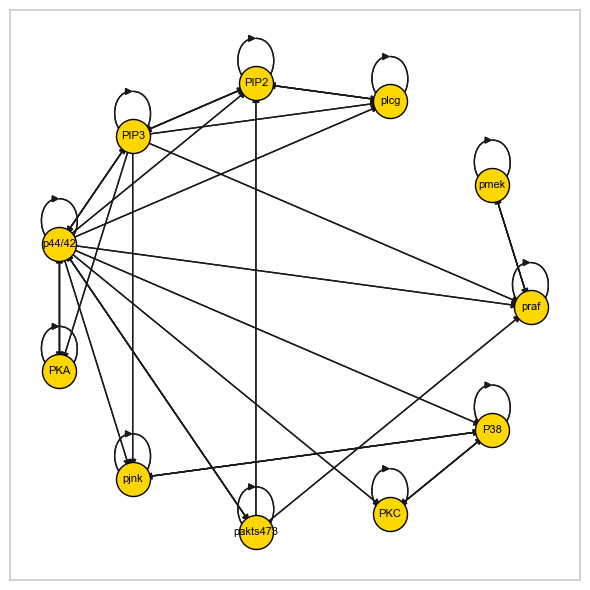

In [821]:
fig, ax = plt.subplots(figsize=(6, 6),tight_layout=True)
ax.grid(False)
# pos = nx.circular_layout(G, scale=2) # center=None, dim=2
pos = hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5)
# pos = nx.spring_layout(G, seed=3113794652)
# pos = hierarchy_pos(G,1)
# nx.draw_networkx(G, pos, font_size=8, font_color="black", with_labels = True, width=3, \
#                  edge_color = edgecolor)
nx.draw_networkx(G, pos, font_size=8, font_color="black", with_labels = True, width=1)
# nx.draw_networkx_nodes(graph, pos, node_size=100, node_color="w")
nx.draw_networkx_edges(G, pos, width = 1) # width = edgewidth
# nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx_nodes(G, pos, edgecolors = "black", node_color='gold', node_size=600)

# nx.draw_networkx_labels(graph, pos, font_size=16, font_color="r")
# plt.savefig("sachs.svg")
# plt.savefig("sachs.png")
plt.show()

In [92]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)